Importing Required Libraries

In [1]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Display the first few rows and dataset information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())

First 5 rows of the dataset:
   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  5YJSA1E22K       King  Seattle    WA      98112.0        2019   TESLA   
1  3MW39FS05R     Yakima   Zillah    WA      98953.0        2024     BMW   
2  1N4AZ0CP0F       King     Kent    WA      98031.0        2015  NISSAN   
3  5YJSA1H20F  Snohomish  Bothell    WA      98012.0        2015   TESLA   
4  JTMAB3FV1N     Yakima   Yakima    WA      98908.0        2022  TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL S          Battery Electric Vehicle (BEV)   
1        330E  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     MODEL S          Battery Electric Vehicle (BEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible du

Handling Missing Values

In [3]:
# Check for missing values in the dataset
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['Electric Range', 'Base MSRP'])

# Fill missing values in 'Electric Utility' with 'Unknown'
df['Electric Utility'].fillna('Unknown', inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing Values in Each Column:
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4


Feature Engineering - Adding Year Column

In [4]:
# Convert 'Model Year' to a datetime format and extract the year
df['Year'] = pd.to_datetime(df['Model Year'], format='%Y').dt.year

# Display the updated dataset
print("Dataset after adding 'Year' column:")
print(df[['Model Year', 'Year']].head())

Dataset after adding 'Year' column:
   Model Year  Year
0        2019  2019
1        2024  2024
2        2015  2015
3        2015  2015
4        2022  2022


EDA - Distribution of EV Types

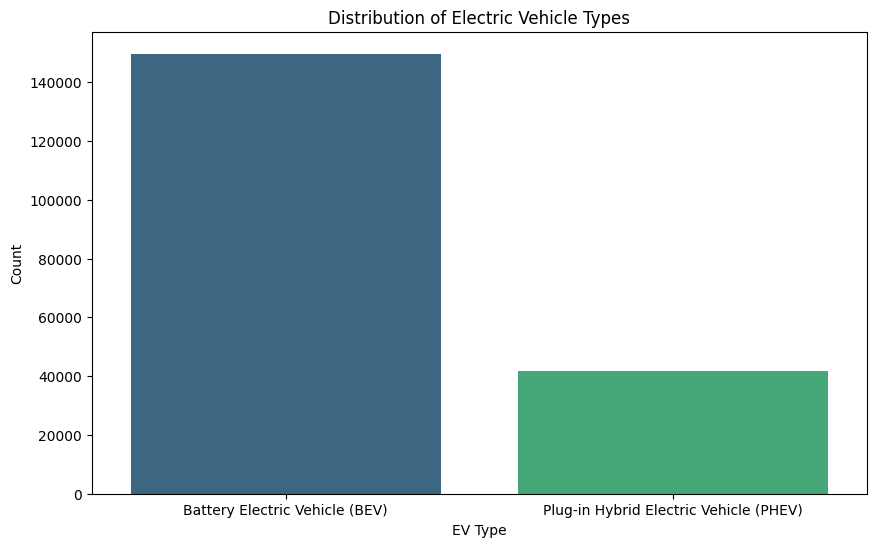

In [5]:
# Plot the distribution of electric vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type', palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('EV Type')
plt.ylabel('Count')
plt.show()

EDA - Electric Range Distribution

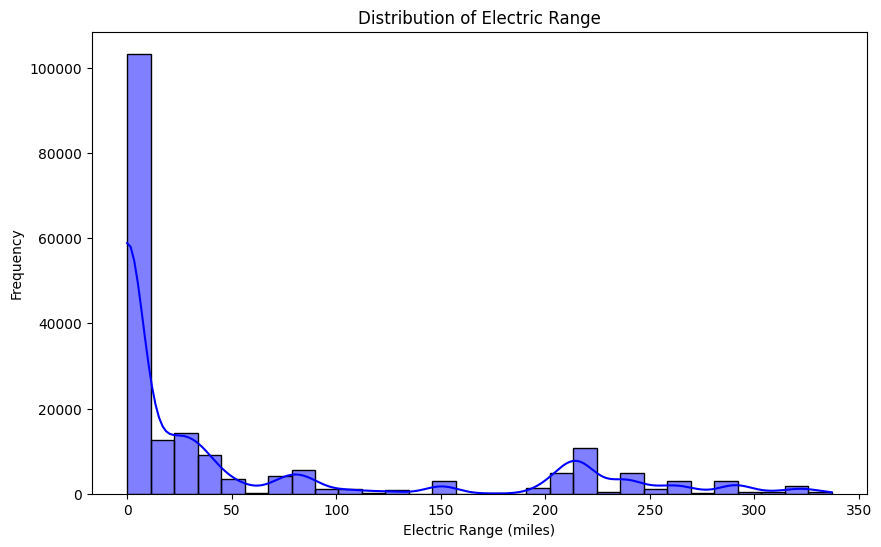

In [6]:
# Plot the distribution of electric range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

EDA - EV Adoption Over Time

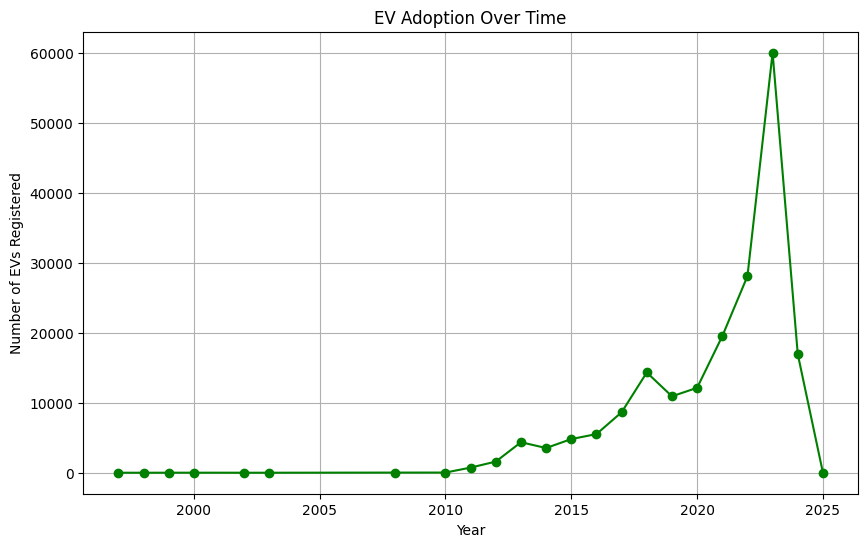

In [7]:
# Group data by year and count the number of EVs registered
ev_adoption = df.groupby('Year').size().reset_index(name='Count')

# Plot EV adoption over time
plt.figure(figsize=(10, 6))
plt.plot(ev_adoption['Year'], ev_adoption['Count'], marker='o', linestyle='-', color='green')
plt.title('EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.grid(True)
plt.show()

EDA - Top 10 EV Manufacturers

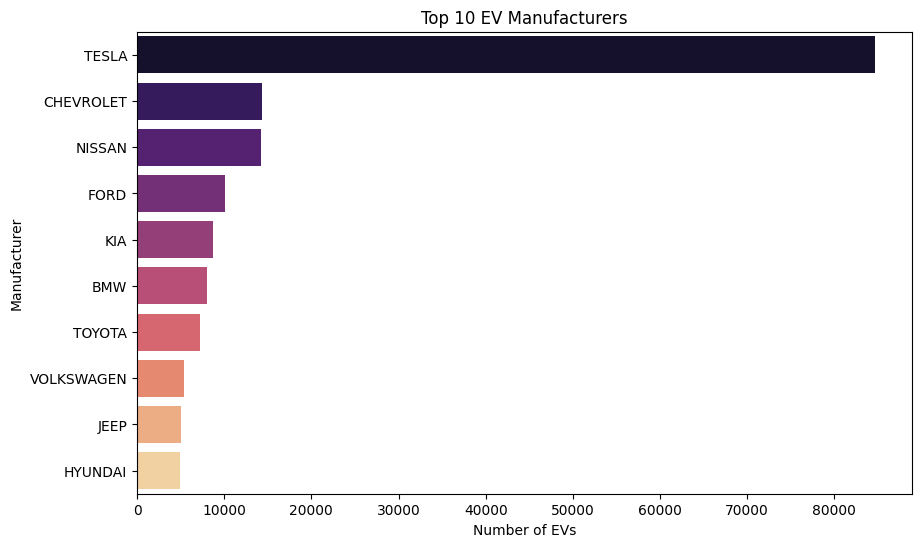

In [8]:
# Get the top 10 manufacturers by EV count
top_manufacturers = df['Make'].value_counts().nlargest(10)

# Plot the top 10 manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='magma')
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of EVs')
plt.ylabel('Manufacturer')
plt.show()

EDA - Correlation Heatmap

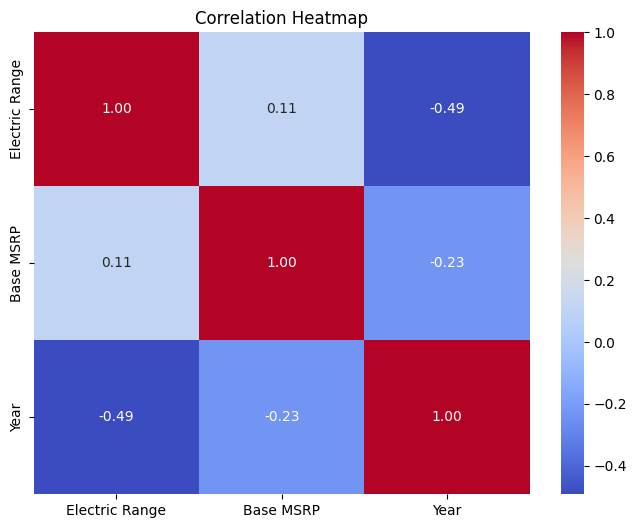

In [9]:
# Compute the correlation matrix for numerical features
corr_matrix = df[['Electric Range', 'Base MSRP', 'Year']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Data Preparation for ML Models

In [10]:
# Select features and target variable
X = df[['Year', 'Electric Range', 'Base MSRP']]
y = df['Electric Range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created successfully.")

Training and testing sets created successfully.


Linear Regression Model

In [11]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}")

Linear Regression - MSE: 5.857181075903052e-26, MAE: 1.9992869674635508e-13


Random Forest Regressor Model

In [12]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}")

Random Forest - MSE: 2.84729115511205e-05, MAE: 4.91092419413823e-05


ARIMA Model for Time Series Forecasting

In [13]:
# Prepare time series data for ARIMA
ev_adoption_ts = ev_adoption.set_index('Year')

# Fit an ARIMA model
arima_model = ARIMA(ev_adoption_ts, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast future EV adoption
forecast = arima_fit.forecast(steps=5)
print("ARIMA Forecast for Next 5 Years:\n", forecast)

ARIMA Forecast for Next 5 Years:
 23    37225.507827
24    47436.069082
25    33300.795954
26     5485.346545
27    15716.921588
Name: predicted_mean, dtype: float64


Visualizing ARIMA Forecast

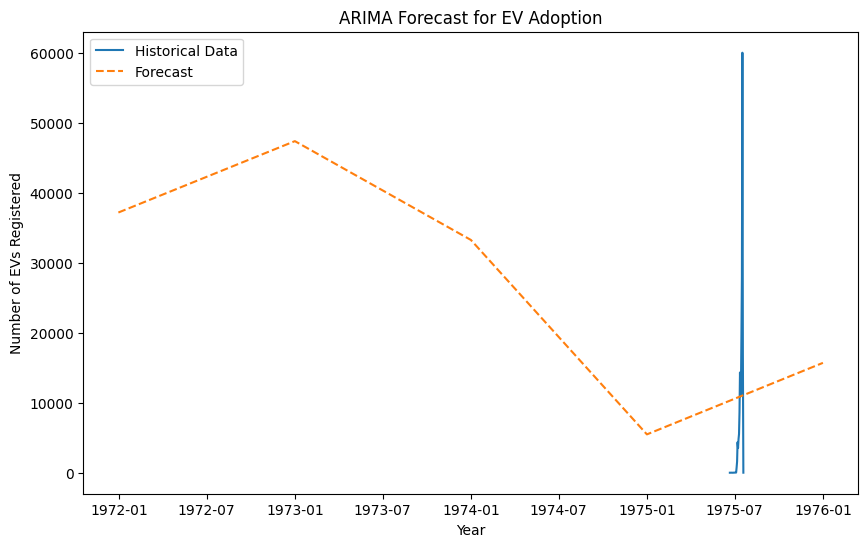

In [14]:
# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(ev_adoption_ts, label='Historical Data')
plt.plot(pd.date_range(start=ev_adoption_ts.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast for EV Adoption')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.legend()
plt.show()

Feature Importance from Random Forest

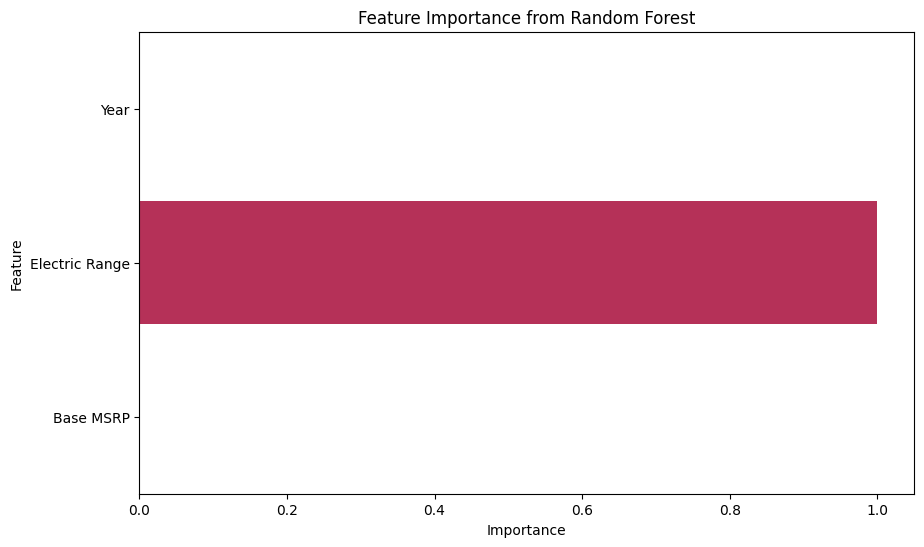

In [15]:
# Extract feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette='rocket')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Actual vs Predicted Values for Random Forest

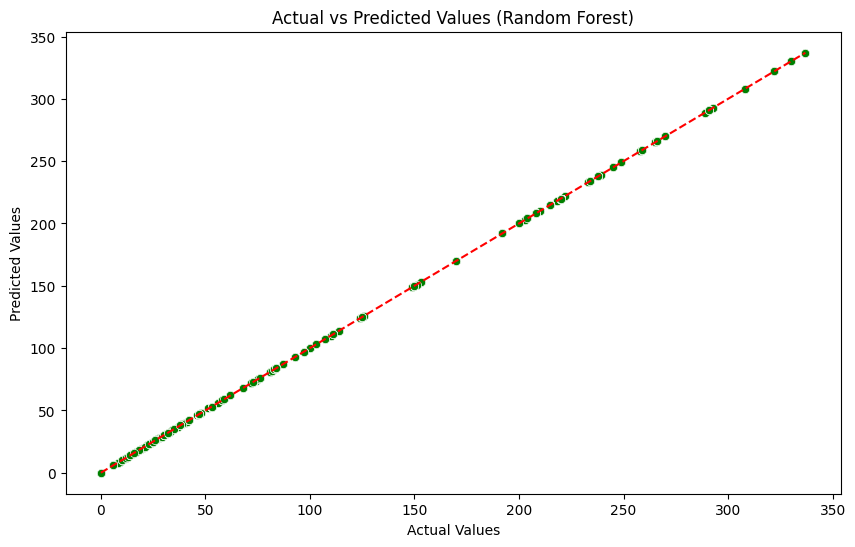

In [17]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Residual Plot for Linear Regression

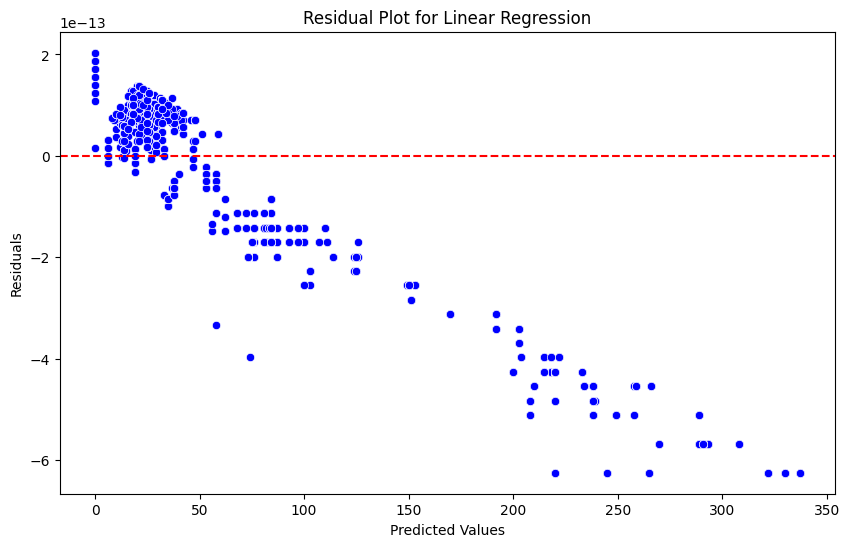

In [16]:
# Calculate residuals for Linear Regression
residuals = y_test - y_pred_lr

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

 Impact of Government Policies (Hypothetical Analysis)

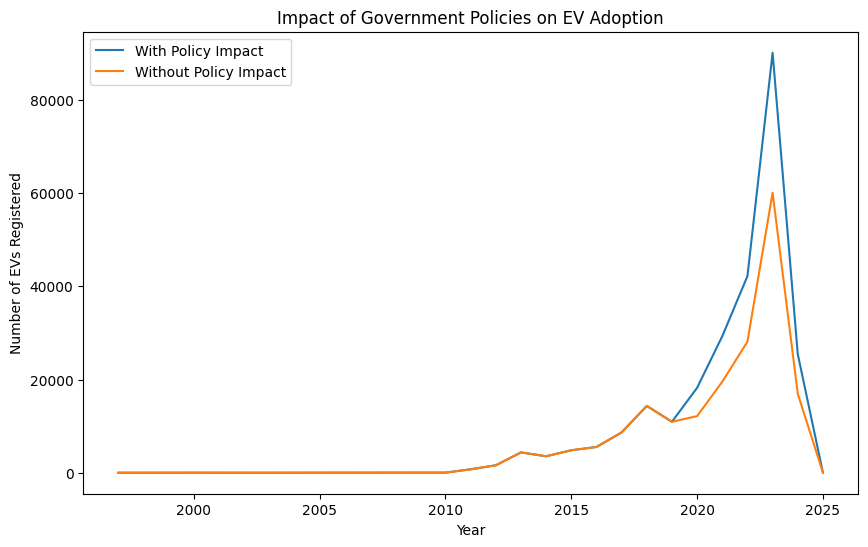

In [18]:
# Hypothetical analysis: Assume policy changes in 2020 increased EV adoption by 50%
policy_impact = ev_adoption_ts.copy()
policy_impact.loc[2020:] = policy_impact.loc[2020:] * 1.5

# Plot the impact of policies
plt.figure(figsize=(10, 6))
plt.plot(policy_impact, label='With Policy Impact')
plt.plot(ev_adoption_ts, label='Without Policy Impact')
plt.title('Impact of Government Policies on EV Adoption')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.legend()
plt.show()

EV Adoption by State

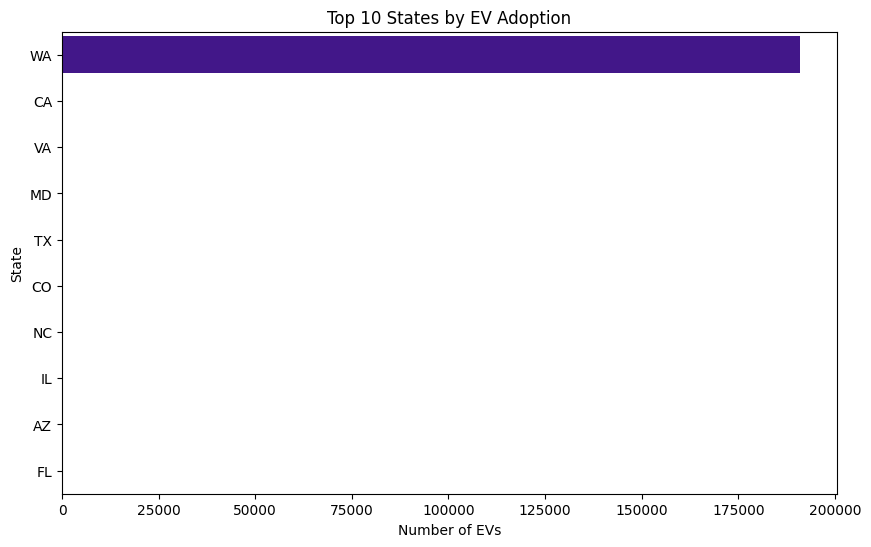

In [19]:
# Get the top 10 states by EV adoption
state_adoption = df['State'].value_counts().nlargest(10)

# Plot EV adoption by state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_adoption.values, y=state_adoption.index, palette='plasma')
plt.title('Top 10 States by EV Adoption')
plt.xlabel('Number of EVs')
plt.ylabel('State')
plt.show()